In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
smcl_data = pd.read_csv("SMCL_ANF_Items.csv")
smcl_data.head()

/Users/hugogarcia/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LOCATION,BRANCH,MATERIAL,BARCODE,RECORD #(ITEM),CREATED(ITEM),RECORD #(BIBLIO),CREATED(BIBLIO),I TYPE,MAT TYPE,...,# RENEWALS,STATUS,DUE DATE,LOUTDATE,LCHKIN,CALL #,OTHER CALL,245|a,100|a,008 Date One
0,1vanf,1v,anf,3.904100e+13,i10000471,7/18/2005 8:45,b10000203,7/18/2005 8:45,10,a,...,0,m,- -,4/28/2016 15:35,5/24/2016 11:00,NATURE MAMMAL,"599 E 1998;""NATURE MAMMAL""",Encyclopedia of mammals /,NaN,1998
1,1zanf,1z,anf,3.904100e+13,i10001098,7/18/2005 8:45,b10000276,7/18/2005 8:45,10,a,...,0,-,- -,4/18/2018 17:17,5/14/2018 10:40,NATURE MARINE,597 E 1998,Encyclopedia of fishes /,NaN,1998
2,1fanf,1f,anf,3.904100e+13,i10001475,7/18/2005 8:45,b1000032x,7/18/2005 8:45,10,a,...,0,-,- -,11/24/2019 16:41,1/10/2020 10:47,NATURE BIRD,598.2 E 1998,Encyclopedia of birds /,NaN,1998
3,1manf,1m,anf,3.904100e+13,i10001517,7/18/2005 8:45,b1000032x,7/18/2005 8:45,10,a,...,0,-,- -,7/12/2018 15:36,7/14/2018 11:13,NATURE BIRD,598.2 E 1998,Encyclopedia of birds /,NaN,1998
4,1eanf,1e,anf,3.904100e+13,i10010816,7/18/2005 8:47,b10002364,7/18/2005 8:47,10,a,...,0,m,- -,6/8/2016 16:57,8/17/2016 17:01,COOKING INTL,641.5972 G,Caribbean and African cooking /,"Grant, Rosamund.",1998


In [3]:
#Renamed the columns for column V, W, X

smcl_data2 = smcl_data.rename(columns={'245|a': 'Book Title','100|a': 'Author',
                                      '008 Date One': 'Published Date'})

#dropped columns

smcl_data_clean = smcl_data2.drop(['LOCATION', 'BARCODE', 'RECORD #(ITEM)',
                 'I TYPE', 'MAT TYPE', 'OTHER CALL', 'MATERIAL'], axis=1)

#created dictionary for the BRANCH column and replaced with actual location

branch_dict = {'0k': 'Bookmobile', '1a':'Atherton', '1b':'Belmont', '1r':'Brisbane','1e':'East Palo Alto','1f':'Foster City'
,'1h':'Half Moon Bay','1m':'Millbrae','1p':'Pacifica Sharp Park','1z':'Pacifica Sanchez','1s':'San Carlos','1v':'Portola Valley','1w':'Woodside'}

#looking for values to combine in Call # field
smcl_data_clean["CALL #"].value_counts()

#cleaning up and only using initial categorey 
smcl_data_clean["CALL #"] = smcl_data_clean["CALL #"].str.split(" ", 1, expand=True)

smcl_data_clean = smcl_data_clean.replace({"BRANCH": branch_dict})

In [4]:
#looking for values to combine in Call # field
smcl_data_clean["CALL #"].value_counts()

#cleaning up and only using initial categorey 
smcl_data_clean["CALL #"] = smcl_data_clean["CALL #"].str.split(" ", 1, expand=True)
smcl_data_clean.head()

,BRANCH,CREATED(ITEM),RECORD #(BIBLIO),CREATED(BIBLIO),YTDCIRC,LYRCIRC,TOT CHKOUT,TOT RENEW,# RENEWALS,STATUS,DUE DATE,LOUTDATE,LCHKIN,CALL #,Book Title,Author,Published Date
0,Portola Valley,7/18/2005 8:45,b10000203,7/18/2005 8:45,0,0,15,6,0,m,- -,4/28/2016 15:35,5/24/2016 11:00,NATURE,Encyclopedia of mammals /,NaN,1998
1,Pacifica Sanchez,7/18/2005 8:45,b10000276,7/18/2005 8:45,0,0,30,11,0,-,- -,4/18/2018 17:17,5/14/2018 10:40,NATURE,Encyclopedia of fishes /,NaN,1998
2,Foster City,7/18/2005 8:45,b1000032x,7/18/2005 8:45,2,3,40,23,0,-,- -,11/24/2019 16:41,1/10/2020 10:47,NATURE,Encyclopedia of birds /,NaN,1998
3,Millbrae,7/18/2005 8:45,b1000032x,7/18/2005 8:45,0,0,17,9,0,-,- -,7/12/2018 15:36,7/14/2018 11:13,NATURE,Encyclopedia of birds /,NaN,1998
4,East Palo Alto,7/18/2005 8:47,b10002364,7/18/2005 8:47,0,0,8,8,0,m,- -,6/8/2016 16:57,8/17/2016 17:01,COOKING,Caribbean and African cooking /,"Grant, Rosamund.",1998


In [5]:
#Looking to see which roll to remove
smcl_data_clean["CALL #"].value_counts()

BIO        6789
COOKING    5231
HISTORY    4966
HEALTH     4575
TRAVEL     4540
           ... 
F-OWE         1
F-COL         1
F-ROS         1
F-HAW         1
F-ROB         1
Name: CALL #, Length: 254, dtype: int64

In [6]:
#Removing items starting with "F-"
smcl_data_removed1 = smcl_data_clean[~smcl_data_clean["CALL #"].astype(str).str.startswith('F-')]
#Removing items starting with "M-"
smcl_data_removed2 = smcl_data_removed1[~smcl_data_removed1["CALL #"].astype(str).str.startswith('M-')]
#Removing items starting with "SF-"
smcl_data_removed3 = smcl_data_removed2[~smcl_data_removed2["CALL #"].astype(str).str.startswith('SF-')]
#Removing items starting with "YA-"
smcl_data_removed4 = smcl_data_removed3[~smcl_data_removed3["CALL #"].astype(str).str.startswith('YA-')]

#Removing items that appear less than 10 times
smcl_data_removed5 = smcl_data_removed4.groupby('CALL #').filter(lambda d: len(d) > 10)

#Removing items that are incorrectly placed into ANF
smcl_data_removed6 = smcl_data_removed5[smcl_data_removed5["CALL #"] != "USB"]
smcl_data_removed7 = smcl_data_removed6[smcl_data_removed6["CALL #"] != "SP"]
smcl_data_removed8 = smcl_data_removed7[smcl_data_removed7["CALL #"] != "CHI"]
smcl_data_removed9 = smcl_data_removed8[smcl_data_removed8["CALL #"] != "J"]
smcl_data_removed10 = smcl_data_removed9[smcl_data_removed9["CALL #"] != "DVD"]
smcl_data_removed11 = smcl_data_removed10[smcl_data_removed10["CALL #"] != "CD"]

In [7]:
#Combining Call # that are the same
smcl_data_removed_final = smcl_data_removed11.replace({
                                                        "SOC": "SOC SCI",
                                                        "PERS": "PERS FIN", "PER": "PERS FIN",
                                                        "SPORTS": "SPORT",
                                                        "LANG": "LANG INST",
                                                        "CRAFTS": "CRAFT",
                                                        "PETS": "PET",
                                                        "SELF": "SELFHELP",
                                                        "LITERATUR": "LIT",
                                                        "PHILOSOPH": "PHILSOPH",
                                                        })

smcl_data_removed_final

,BRANCH,CREATED(ITEM),RECORD #(BIBLIO),CREATED(BIBLIO),YTDCIRC,LYRCIRC,TOT CHKOUT,TOT RENEW,# RENEWALS,STATUS,DUE DATE,LOUTDATE,LCHKIN,CALL #,Book Title,Author,Published Date
0,Portola Valley,7/18/2005 8:45,b10000203,7/18/2005 8:45,0,0,15,6,0,m,- -,4/28/2016 15:35,5/24/2016 11:00,NATURE,Encyclopedia of mammals /,NaN,1998
1,Pacifica Sanchez,7/18/2005 8:45,b10000276,7/18/2005 8:45,0,0,30,11,0,-,- -,4/18/2018 17:17,5/14/2018 10:40,NATURE,Encyclopedia of fishes /,NaN,1998
2,Foster City,7/18/2005 8:45,b1000032x,7/18/2005 8:45,2,3,40,23,0,-,- -,11/24/2019 16:41,1/10/2020 10:47,NATURE,Encyclopedia of birds /,NaN,1998
3,Millbrae,7/18/2005 8:45,b1000032x,7/18/2005 8:45,0,0,17,9,0,-,- -,7/12/2018 15:36,7/14/2018 11:13,NATURE,Encyclopedia of birds /,NaN,1998
4,East Palo Alto,7/18/2005 8:47,b10002364,7/18/2005 8:47,0,0,8,8,0,m,- -,6/8/2016 16:57,8/17/2016 17:01,COOKING,Caribbean and African cooking /,"Grant, Rosamund.",1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70785,Half Moon Bay,3/16/2020 10:47,b2849555x,11/12/2019 14:54,0,0,0,0,0,t,- -,- -,- -,ART,Blender /,"Van Gumster, Jason,",2020
70786,Millbrae,3/16/2020 10:47,b2849555x,11/12/2019 14:54,0,0,0,0,0,t,- -,- -,- -,ART,Blender /,"Van Gumster, Jason,",2020
70787,San Carlos,3/16/2020 10:47,b2849555x,11/12/2019 14:54,0,0,0,0,0,t,- -,- -,- -,ART,Blender /,"Van Gumster, Jason,",2020
70788,East Palo Alto,3/16/2020 10:47,b2849555x,11/12/2019 14:54,0,0,0,0,0,t,- -,- -,- -,ART,Blender /,"Van Gumster, Jason,",2020


In [123]:
#Combined two colums: "TOT CHKOUT" + "TOT RENEW" and created a new total column "TOT CIRC"

TOT_CIRC = smcl_data_removed_final["TOT CHKOUT"] + smcl_data_removed_final["TOT RENEW"]
smcl_data_removed_final["TOT CIRC"] =  TOT_CIRC

#New column "TOT CIRC" was added in the end of the dataset, so we inserted next to the "TOT RENEW" column
smcl_data_df = smcl_data_removed_final[["BRANCH", "Book Title", "Author", "Published Date", "CALL #", "TOT CHKOUT", "TOT RENEW", "TOT CIRC", "STATUS", "DUE DATE", "LOUTDATE", "LCHKIN", "CREATED(ITEM)"]]

#Created a new column "Region"
smcl_data_df["Region"] = ""

#Listed the city names into regions
north = ["Brisbane", "Millbrae", "Pacifica Sanchez", "Pacifica Sharp Park"]
south = ["Atherton", "Belmont", "East Palo Alto", "San Carlos", "Woodside"]
east = ["Bookmobile", "Foster City"]
west = ["Half Moon Bay", "Portola Valley"]

#checks column "Branch" and if value matches list name, then it will assign new text into "Region" column
north_df = smcl_data_df.loc[np.isin(smcl_data_df["BRANCH"], north), "Region"] = "North"
south_df = smcl_data_df.loc[np.isin(smcl_data_df["BRANCH"], south), "Region"] = "South"
east_df = smcl_data_df.loc[np.isin(smcl_data_df["BRANCH"], east), "Region"] = "East"
west_df = smcl_data_df.loc[np.isin(smcl_data_df["BRANCH"], west), "Region"] = "West"

smcl_data_df.round(2)

/Users/hugogarcia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,BRANCH,Book Title,Author,Published Date,CALL #,TOT CHKOUT,TOT RENEW,TOT CIRC,STATUS,DUE DATE,LOUTDATE,LCHKIN,CREATED(ITEM),Region
0,Portola Valley,Encyclopedia of mammals /,NaN,1998,NATURE,15,6,21,m,- -,4/28/2016 15:35,5/24/2016 11:00,7/18/2005 8:45,West
1,Pacifica Sanchez,Encyclopedia of fishes /,NaN,1998,NATURE,30,11,41,-,- -,4/18/2018 17:17,5/14/2018 10:40,7/18/2005 8:45,North
2,Foster City,Encyclopedia of birds /,NaN,1998,NATURE,40,23,63,-,- -,11/24/2019 16:41,1/10/2020 10:47,7/18/2005 8:45,East
3,Millbrae,Encyclopedia of birds /,NaN,1998,NATURE,17,9,26,-,- -,7/12/2018 15:36,7/14/2018 11:13,7/18/2005 8:45,North
4,East Palo Alto,Caribbean and African cooking /,"Grant, Rosamund.",1998,COOKING,8,8,16,m,- -,6/8/2016 16:57,8/17/2016 17:01,7/18/2005 8:47,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70785,Half Moon Bay,Blender /,"Van Gumster, Jason,",2020,ART,0,0,0,t,- -,- -,- -,3/16/2020 10:47,West
70786,Millbrae,Blender /,"Van Gumster, Jason,",2020,ART,0,0,0,t,- -,- -,- -,3/16/2020 10:47,North
70787,San Carlos,Blender /,"Van Gumster, Jason,",2020,ART,0,0,0,t,- -,- -,- -,3/16/2020 10:47,South
70788,East Palo Alto,Blender /,"Van Gumster, Jason,",2020,ART,0,0,0,t,- -,- -,- -,3/16/2020 10:47,South


In [150]:
#created a pivot table of the dataset
smcl_crosstable = smcl_data_df.pivot_table(values="TOT CIRC", index=["CALL #"], columns= "Region", aggfunc='mean')

smcl_crosstable.head()

Region,East,North,South,West
CALL #,,,,
ART,38.512972,29.029825,27.581124,26.528358
BIO,20.948772,18.158088,16.612579,16.178525
BUSINESS,35.472449,24.177956,28.715185,21.751748
COLLECT,10.258065,8.171717,9.070588,6.457143
COMPUTE,47.393352,27.283668,32.219316,21.936709


Text(0, 0.5, 'Book Category')

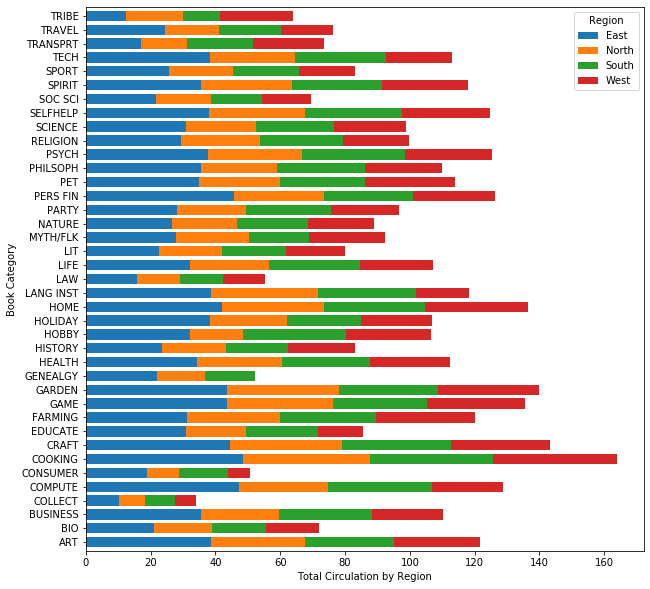

In [146]:
#Does total circulation look the same across regions?

region_bar_plot = smcl_crosstable.plot(kind='barh', legend=True, stacked=True, width =0.75, figsize=[10,10])
region_bar_plot.set_xlabel("Total Circulation by Region")
region_bar_plot.set_ylabel("Book Category")